In [1]:
from scipy.integrate import quad
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
%matplotlib inline

In [2]:
from matplotlib.font_manager import FontManager, FontProperties
HeiTi = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc')
#有中文出现的情况，需要u'内容'

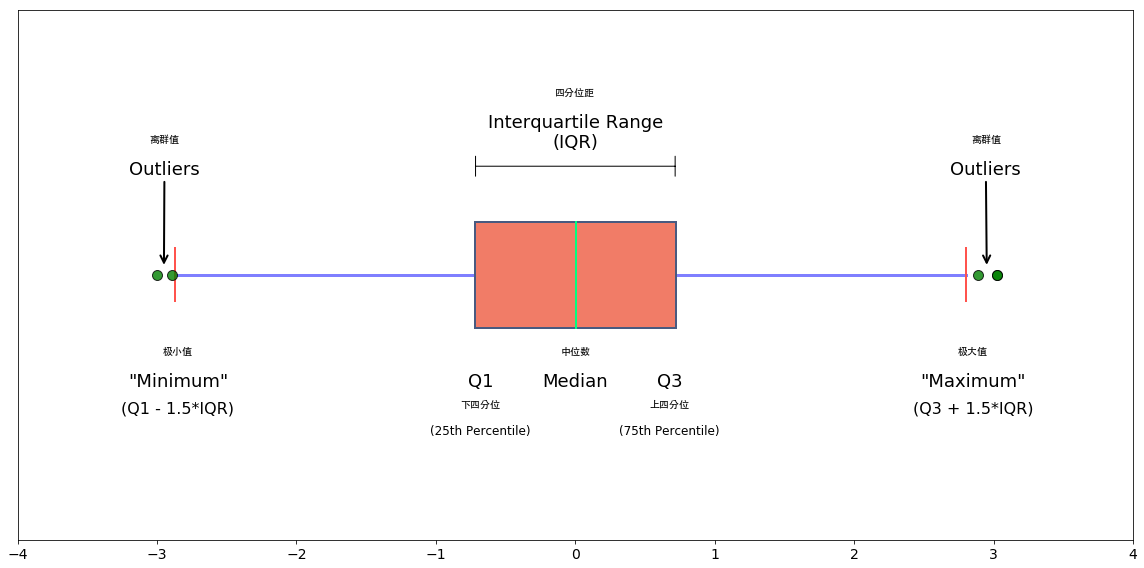

In [3]:
np.random.seed(910977)
mu, sigma = 0.0, 1.0
normal_data = np.random.normal(mu, sigma, size=1000)
fig_norm, ax_norm = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
bp = ax_norm.boxplot(normal_data, vert=False, 
                     showfliers=True, 
                     patch_artist=True,
                     positions=[0],
                     boxprops={'linestyle':'--', 'linewidth':2, 
                               'color':'#495a80', 'facecolor':'#f17c67',
                              'alpha':1.0},
                     medianprops={'linestyle':'-', 'linewidth':2,
                                 'color':'#00ff80'},
                     whiskerprops={'linestyle':'-', 'linewidth':3, 
                               'color':'blue', 'alpha':0.5},
                     capprops={'linestyle':'-', 'linewidth':2, 
                               'color':'#ff534d'},
                     flierprops={'marker':'o', 'markerfacecolor':'green',
                                'markersize':10, 'linestyle':'none', 'alpha':.8},
                     widths=.2,
                     zorder=1)
ax_norm.set_xlim(-4, 4)
plt.xticks(fontsize=14)
ax_norm.set_yticks([])

# 四分位距
ax_norm.annotate(r'', xy=(-.73, .205), xycoords='data', 
                 xytext=(.73, .205), textcoords='data', 
                 arrowprops={'arrowstyle':"|-|", 'connectionstyle':"arc3"});
ax_norm.text(0, .24, "Interquartile Range\n(IQR)", horizontalalignment='center', fontsize=18)
ax_norm.text(0, .34, u"四分位距", horizontalalignment='center', fontsize=18,fontproperties=HeiTi)

ax_norm.text(0, -.21, "Median", horizontalalignment='center', fontsize=18,)
ax_norm.text(0, -.15, u"中位数", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)

ax_norm.text(2.85, -.21, "\"Maximum\"", horizontalalignment='center', fontsize=18)
ax_norm.text(2.85, -.15, u"极大值", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)
ax_norm.text(-2.85, -.21, "\"Minimum\"", horizontalalignment='center', fontsize=18)
ax_norm.text(-2.85, -.15, u"极小值", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)

ax_norm.text(-.68, -.21, r"Q1", horizontalalignment='center', fontsize=18)
ax_norm.text(-.68, -.25, u"下四分位", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)
ax_norm.text(-2.85, -.26, r"(Q1 - 1.5*IQR)", horizontalalignment='center', fontsize=16)
ax_norm.text(.6745, -.21, r"Q3", horizontalalignment='center', fontsize=18)
ax_norm.text(.6765, -.25, u"上四分位", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)
ax_norm.text(.6765, -.30, r"(75th Percentile)", horizontalalignment='center', fontsize=12)
ax_norm.text(-.68, -.30, r"(25th Percentile)", horizontalalignment='center', fontsize=12)
ax_norm.text(2.85, -.26, r"(Q3 + 1.5*IQR)", horizontalalignment='center', fontsize=16)

ax_norm.annotate('Outliers', xy=(2.95,0.015), xytext=(2.69,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center')
ax_norm.text(2.95, 0.25, u"离群值", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)

ax_norm.annotate('Outliers', xy=(-2.95,0.015), xytext=(-3.20,0.20), fontsize = 18,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center')
ax_norm.text(-2.95, 0.25, u"离群值", horizontalalignment='center', fontsize=18, fontproperties=HeiTi)
fig_norm.tight_layout()
plt.show()
# fig_norm.savefig('simple_boxplot.png', dpi = 600)

In [4]:
mean_norm = bp['medians'][0].get_xydata()[0,0] # 平均值
whisker_bottom = bp['whiskers'][0].get_xydata() # 下四分卫Q1 和 极小值
Q1, mini = whisker_bottom[0,0], whisker_bottom[1,0]
whisker_top = bp['whiskers'][1].get_xydata() # 上四分位Q3 和 极大值
Q3, maxi = whisker_top[0,0], whisker_top[1,0]
print("均值：\t\t{0}".format(mean_norm))
print("下四分位：\t{0}".format(Q1))
print("上四分位：\t{0}".format(Q3))
print("极小值：\t\t{0}".format(mini))
print("极大值：\t\t{0}".format(maxi))

均值：		0.0015494000258886803
下四分位：	-0.7228368513335255
上四分位：	0.7192552870657332
极小值：		-2.870477765151987
极大值：		2.8009255994924045


In [5]:
q1_p25 = norm.ppf(1.0/4, 0.0, 1.0)
q2_p50 = norm.ppf(2.0/4, 0.0, 1.0)
q3_p75 = norm.ppf(3.0/4, 0.0, 1.0)
print("标准正态分布的下四分位：{0:4f}，\n标准正态分布的上四分位：{1:4f}".format(q1_p25, q3_p75))
iqr = q3_p75 - q1_p25
norm_mini = q1_p25 - 1.5*iqr
norm_maxi = q3_p75 + 1.5*iqr
print("标准正态分布的极小值：{0:4f}，\n标准正态分布的极大值：{1:4f}".format(norm_mini, norm_maxi))
q0_pmini = norm.cdf(norm_mini, 0.0, 1.0)
q4_pmaxi = norm.cdf(norm_maxi, 0.0, 1.0)
print("标准正态分布在极小值处的CDF：{0:4f}，\n标准正态分布在极大值处的CDF：{1:4f}".format(q0_pmini, q4_pmaxi))
p_q1_q0 = 1.0/4 - q0_pmini # 在极小值和下四分位之间的CDF
print("标准正态分布在极小值和下四分位区间的CDF：{0:4f}".format(p_q1_q0))

标准正态分布的下四分位：-0.674490，
标准正态分布的上四分位：0.674490
标准正态分布的极小值：-2.697959，
标准正态分布的极大值：2.697959
标准正态分布在极小值处的CDF：0.003488，
标准正态分布在极大值处的CDF：0.996512
标准正态分布在极小值和下四分位区间的CDF：0.246512


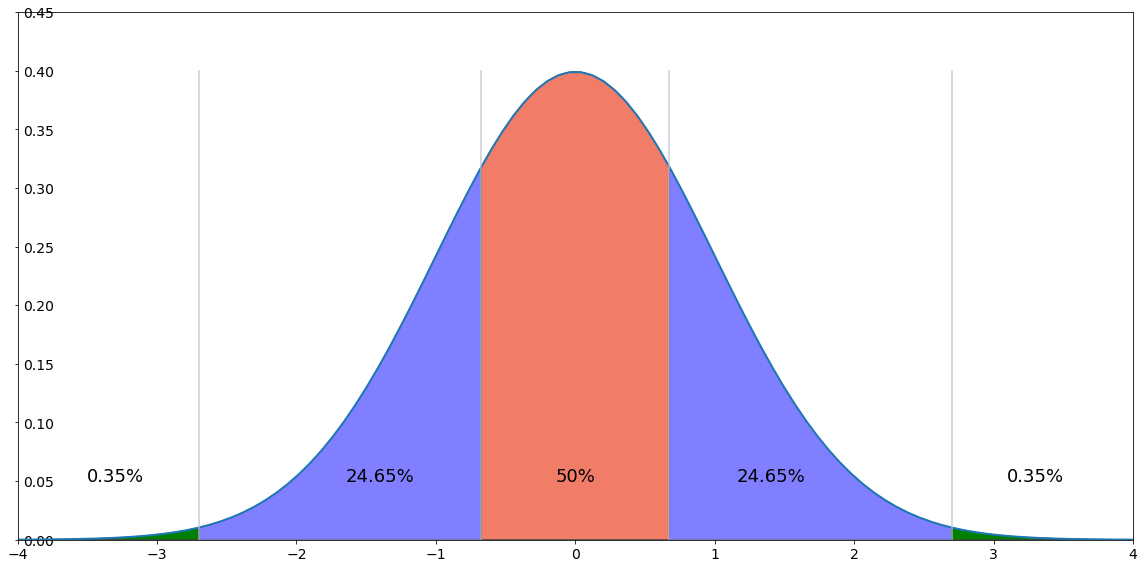

In [6]:
x = np.linspace(-4, 4, num=100)
x_pdf = norm.pdf(x)
fig_norm_pdf, ax_pdf = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))
ax_pdf.plot(x, x_pdf, linewidth=2)

ax_pdf.plot([norm_mini]*2, [0.0, 0.40], 
            [q1_p25]*2, [0.0, 0.40], 
            [q3_p75]*2, [.0, 0.4], 
            [norm_maxi]*2, [.0, 0.40], color='#c3bed4', alpha=.8)
x1, x2, x3, x4, x5, x6 = -4.0, norm_mini, q1_p25, q3_p75, norm_maxi, 4.0
interval_1 = np.linspace(x1, x2, num=100)
interval_2 = np.linspace(x2, x3, num=100)
interval_3 = np.linspace(x3, x4, num=100)
interval_4 = np.linspace(x4, x5, num=100)
interval_5 = np.linspace(x5, x6, num=100)
y1 = norm.pdf(interval_1)
y2 = norm.pdf(interval_2)
y3 = norm.pdf(interval_3)
y4 = norm.pdf(interval_4)
y5 = norm.pdf(interval_5)
verts_1 = [(x1,0)] + list(zip(interval_1, y1)) + [(x2,0)]
poly_1 = Polygon(verts_1, facecolor='green', edgecolor='0.2', alpha = 1.0)
ax_pdf.add_patch(poly_1)
verts_2 = [(x2,0)] + list(zip(interval_2, y2)) + [(x3,0)]
poly_2 = Polygon(verts_2, facecolor='blue', edgecolor='0.2', alpha = 0.5)
ax_pdf.add_patch(poly_2)
verts_3 = [(x3,0)] + list(zip(interval_3, y3)) + [(x4,0)]
poly_3 = Polygon(verts_3, facecolor='#f17c67', edgecolor='0.2', alpha = 1.0)
ax_pdf.add_patch(poly_3)
verts_4 = [(x4,0)] + list(zip(interval_4, y4)) + [(x5,0)]
poly_4 = Polygon(verts_4, facecolor='blue', edgecolor='0.2', alpha = 0.5)
ax_pdf.add_patch(poly_4)
verts_5 = [(x5,0)] + list(zip(interval_5, y5)) + [(x6,0)]
poly_5 = Polygon(verts_5, facecolor='green', edgecolor='0.2', alpha = 1.0)
ax_pdf.add_patch(poly_5)
ax_pdf.text(-3.3, 0.05, "{0:.2%}".format(q0_pmini), fontsize=18, horizontalalignment='center')
ax_pdf.text(-1.4, 0.05, "{0:.2%}".format(0.25-q0_pmini), fontsize=18, horizontalalignment='center')
ax_pdf.text(0, 0.05, "{0:d}%".format(50), fontsize=18, horizontalalignment='center')
ax_pdf.text(1.4, 0.05, "{0:.2%}".format(0.25-q0_pmini), fontsize=18, horizontalalignment='center')
ax_pdf.text(3.3, 0.05, "{0:.2%}".format(q0_pmini), fontsize=18, horizontalalignment='center')
ax_pdf.set_xlim(-4.0, 4.0)
ax_pdf.set_ylim(.0, .45)
ax_pdf.tick_params(axis='y', pad=-40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig_norm_pdf.tight_layout()
plt.show()
# fig_norm_pdf.savefig('normal.png', dpi=600)

## 总结
将高斯分布随机序列的箱线图和其概率密度函数对比：   
![](./simple_boxplot.png)
![](./normal.png)